In [1]:
!pip3 install tensorflow pandas matplotlib

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
df=pd.read_csv('train.csv')

In [4]:
from tensorflow.keras.layers import TextVectorization

In [5]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
x=df['comment_text']
y=df[df.columns[2:]].values

In [7]:
MAX_FEATURES=1000000 #The numbers of words in the vocab

In [8]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,
                             output_sequence_length=2000,
                             output_mode='int')

In [9]:
vectorizer.adapt(x.values)  #x.values to convert into a numpy array

In [10]:
vectorized_text=vectorizer(x.values)

In [11]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [12]:
dataset.as_numpy_iterator().next()

2023-07-06 07:11:59.533905: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159571,2000]
	 [[{{node Placeholder/_0}}]]
2023-07-06 07:11:59.534062: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159571,6]
	 [[{{node Placeholder/_1}}]]


(array([[1312,  454,  157, ...,    0,    0,    0],
        [ 185,   35, 1798, ...,    0,    0,    0],
        [ 785,    8,   69, ...,    0,    0,    0],
        ...,
        [   2,  113, 1699, ...,    0,    0,    0],
        [   8,  127,    6, ...,    0,    0,    0],
        [  56,    9,  344, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [13]:
batch_x, batch_y=dataset.as_numpy_iterator().next()

In [14]:
train=dataset.take(int(len(dataset)*0.7))
val=dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test=dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [15]:
train_generator=train.as_numpy_iterator()

2023-07-06 07:12:00.290753: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159571,2000]
	 [[{{node Placeholder/_0}}]]
2023-07-06 07:12:00.290918: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159571,6]
	 [[{{node Placeholder/_1}}]]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [17]:
model=Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [18]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [19]:
history=model.fit(train, epochs=16, validation_data=val)

Epoch 1/16
6981/6981 [==============================] - ETA: 0s - loss: 0.0649

2023-07-06 08:01:35.631486: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159571,6]
	 [[{{node Placeholder/_1}}]]
2023-07-06 08:01:35.631732: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159571,2000]
	 [[{{node Placeholder/_0}}]]


6981/6981 [==============================] - 3064s 439ms/step - loss: 0.0649 - val_loss: 0.0473
Epoch 2/16
6981/6981 [==============================] - 2785s 399ms/step - loss: 0.0468 - val_loss: 0.0420
Epoch 3/16
6981/6981 [==============================] - 2786s 399ms/step - loss: 0.0420 - val_loss: 0.0397
Epoch 4/16
6981/6981 [==============================] - 2791s 400ms/step - loss: 0.0379 - val_loss: 0.0346
Epoch 5/16
6981/6981 [==============================] - 10466s 1s/step - loss: 0.0343 - val_loss: 0.0298
Epoch 6/16
6981/6981 [==============================] - 4295s 615ms/step - loss: 0.0314 - val_loss: 0.0295
Epoch 7/16
6981/6981 [==============================] - 5146s 737ms/step - loss: 0.0277 - val_loss: 0.0240
Epoch 8/16
6981/6981 [==============================] - 2814s 403ms/step - loss: 0.0254 - val_loss: 0.0223
Epoch 9/16
6981/6981 [==============================] - 2816s 403ms/step - loss: 0.0228 - val_loss: 0.0189
Epoch 10/16
6981/6981 [===========================

In [20]:
from matplotlib import pyplot as plt

<Figure size 576x576 with 0 Axes>

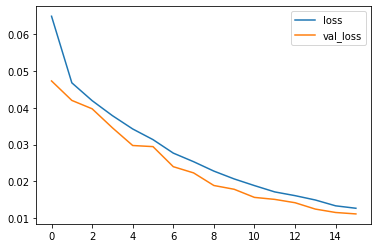

In [21]:
plt.figure(figsize=(8, 8))
pd.DataFrame(history.history).plot()
plt.show()

In [22]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [23]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [24]:
for batch in test.as_numpy_iterator():
    #Unpack the batch
    x_true, y_true=batch
    #Make a prediction
    yhat=model.predict(x_true)
    
    #Flatten the prediction
    #Flatten means 16x6 array to 16*6x1 array
    y_true=y_true.flatten()
    yhat=yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

2023-07-07 00:33:20.574032: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159571,2000]
	 [[{{node Placeholder/_0}}]]
2023-07-07 00:33:20.574381: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159571,2000]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 49ms/step


In [25]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9380257725715637, Recall: 0.9465195536613464, Accuracy: 0.5185556411743164


In [26]:
f1=2*pre.result().numpy()*re.result().numpy()/(pre.result().numpy()+re.result().numpy())

In [27]:
f1

0.9422535220758558